Epoch [1/20], Train Loss: 2.3296, Train Accuracy: 0.0760, Valid Loss: 2.3238, Valid Accuracy: 0.1100
Epoch [2/20], Train Loss: 1.8824, Train Accuracy: 0.6820, Valid Loss: 2.3514, Valid Accuracy: 0.0900
Epoch [3/20], Train Loss: 1.5256, Train Accuracy: 0.9100, Valid Loss: 2.4055, Valid Accuracy: 0.0750
Epoch [4/20], Train Loss: 1.1382, Train Accuracy: 0.9640, Valid Loss: 2.4801, Valid Accuracy: 0.0950
Epoch [5/20], Train Loss: 0.7632, Train Accuracy: 0.9930, Valid Loss: 2.5800, Valid Accuracy: 0.0900
Epoch [6/20], Train Loss: 0.4650, Train Accuracy: 1.0000, Valid Loss: 2.7072, Valid Accuracy: 0.1100
Epoch [7/20], Train Loss: 0.2733, Train Accuracy: 1.0000, Valid Loss: 2.8240, Valid Accuracy: 0.0900
Epoch [8/20], Train Loss: 0.1666, Train Accuracy: 1.0000, Valid Loss: 2.9299, Valid Accuracy: 0.0900
Epoch [9/20], Train Loss: 0.1090, Train Accuracy: 1.0000, Valid Loss: 3.0229, Valid Accuracy: 0.0850
Epoch [10/20], Train Loss: 0.0778, Train Accuracy: 1.0000, Valid Loss: 3.0995, Valid Accura

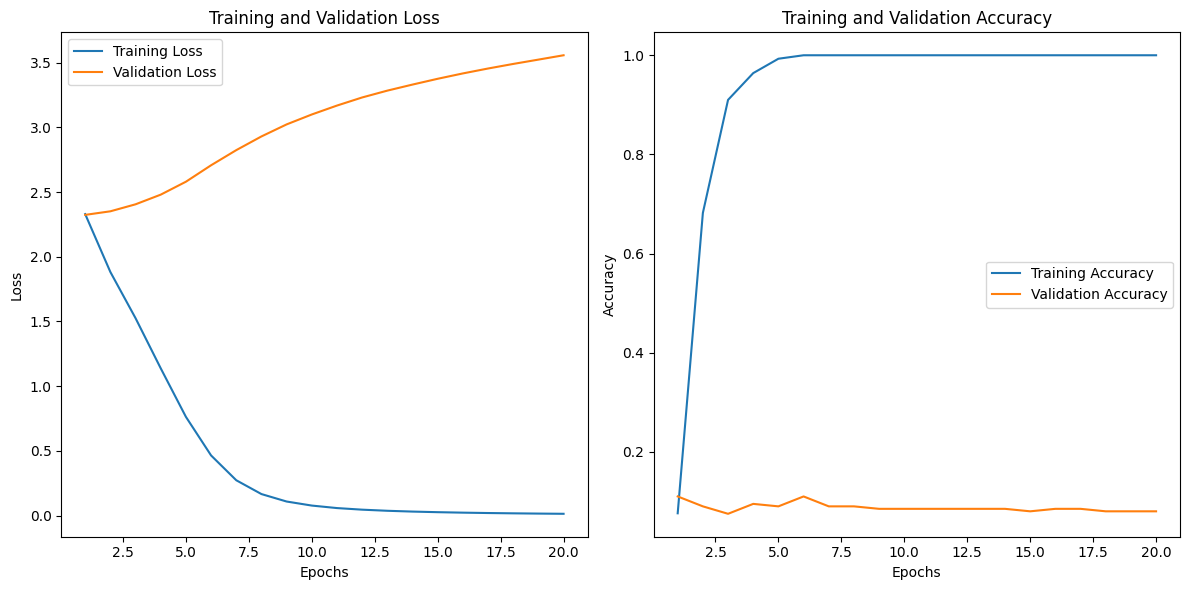


Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.14      0.19        22
           1       0.14      0.14      0.14        22
           2       0.12      0.21      0.15        19
           3       0.00      0.00      0.00        12
           4       0.09      0.11      0.10        19
           5       0.08      0.10      0.09        21
           6       0.07      0.03      0.04        30
           7       0.12      0.12      0.12        24
           8       0.08      0.12      0.10        17
           9       0.15      0.14      0.15        14

    accuracy                           0.11       200
   macro avg       0.12      0.11      0.11       200
weighted avg       0.12      0.11      0.11       200


Confusion Matrix:
 [[3 2 2 1 1 8 1 2 1 1]
 [1 3 5 0 2 3 1 6 1 0]
 [1 1 4 1 2 4 3 1 0 2]
 [1 3 2 0 2 1 0 1 2 0]
 [0 1 3 2 2 3 1 1 4 2]
 [0 3 4 1 4 2 2 1 2 2]
 [2 2 2 3 4 0 1 8 5 3]
 [1 1 5 2 3 2 3 3 3 1]
 [0 3 4 0 2 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, accuracy_score

# Define a simple neural network with one hidden layer
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Parameters
input_size = 784  # Example for MNIST (28x28 images flattened)
hidden_size = 128
num_classes = 10
learning_rate = 0.001
num_epochs = 20
batch_size = 64

# Generate synthetic data (example data, replace with your dataset)
# Using random data for demonstration purposes
np.random.seed(0)
torch.manual_seed(0)
X_train = torch.randn(1000, input_size)
y_train = torch.randint(0, num_classes, (1000,))
X_valid = torch.randn(200, input_size)
y_valid = torch.randint(0, num_classes, (200,))
X_test = torch.randn(200, input_size)
y_test = torch.randint(0, num_classes, (200,))

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
valid_dataset = torch.utils.data.TensorDataset(X_valid, y_valid)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Model, criterion, optimizer
model = SimpleNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training and validation
train_losses, valid_losses = [], []
train_perfs, valid_perfs = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss, train_correct = 0, 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * batch_x.size(0)
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == batch_y).sum().item()

    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_perfs.append(train_accuracy)

    model.eval()
    valid_loss, valid_correct = 0, 0
    with torch.no_grad():
        for batch_x, batch_y in valid_loader:
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            valid_loss += loss.item() * batch_x.size(0)
            _, predicted = torch.max(outputs, 1)
            valid_correct += (predicted == batch_y).sum().item()

    valid_loss /= len(valid_loader.dataset)
    valid_accuracy = valid_correct / len(valid_loader.dataset)
    valid_losses.append(valid_loss)
    valid_perfs.append(valid_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Valid Loss: {valid_loss:.4f}, Valid Accuracy: {valid_accuracy:.4f}')

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_perfs, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), valid_perfs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

# Evaluate on the test set
model.eval()
test_preds, test_labels = [], []
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        outputs = model(batch_x)
        _, predicted = torch.max(outputs, 1)
        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(batch_y.cpu().numpy())

# Print classification report
print("\nClassification Report:\n", classification_report(test_labels, test_preds))
print("\nConfusion Matrix:\n", confusion_matrix(test_labels, test_preds))
print(f"\nCohen's Kappa: {cohen_kappa_score(test_labels, test_preds):.3f}")
print(f"Accuracy: {accuracy_score(test_labels, test_preds):.3f}")


Epoch [1/20], Train Loss: 2.3296, Train Accuracy: 0.0760, Valid Loss: 2.3238, Valid Accuracy: 0.1100
Epoch [2/20], Train Loss: 1.8824, Train Accuracy: 0.6820, Valid Loss: 2.3514, Valid Accuracy: 0.0900
Epoch [3/20], Train Loss: 1.5256, Train Accuracy: 0.9100, Valid Loss: 2.4055, Valid Accuracy: 0.0750
Epoch [4/20], Train Loss: 1.1382, Train Accuracy: 0.9640, Valid Loss: 2.4801, Valid Accuracy: 0.0950
Epoch [5/20], Train Loss: 0.7632, Train Accuracy: 0.9930, Valid Loss: 2.5800, Valid Accuracy: 0.0900
Epoch [6/20], Train Loss: 0.4650, Train Accuracy: 1.0000, Valid Loss: 2.7072, Valid Accuracy: 0.1100
Epoch [7/20], Train Loss: 0.2733, Train Accuracy: 1.0000, Valid Loss: 2.8240, Valid Accuracy: 0.0900
Epoch [8/20], Train Loss: 0.1666, Train Accuracy: 1.0000, Valid Loss: 2.9299, Valid Accuracy: 0.0900
Epoch [9/20], Train Loss: 0.1090, Train Accuracy: 1.0000, Valid Loss: 3.0229, Valid Accuracy: 0.0850
Epoch [10/20], Train Loss: 0.0778, Train Accuracy: 1.0000, Valid Loss: 3.0995, Valid Accura

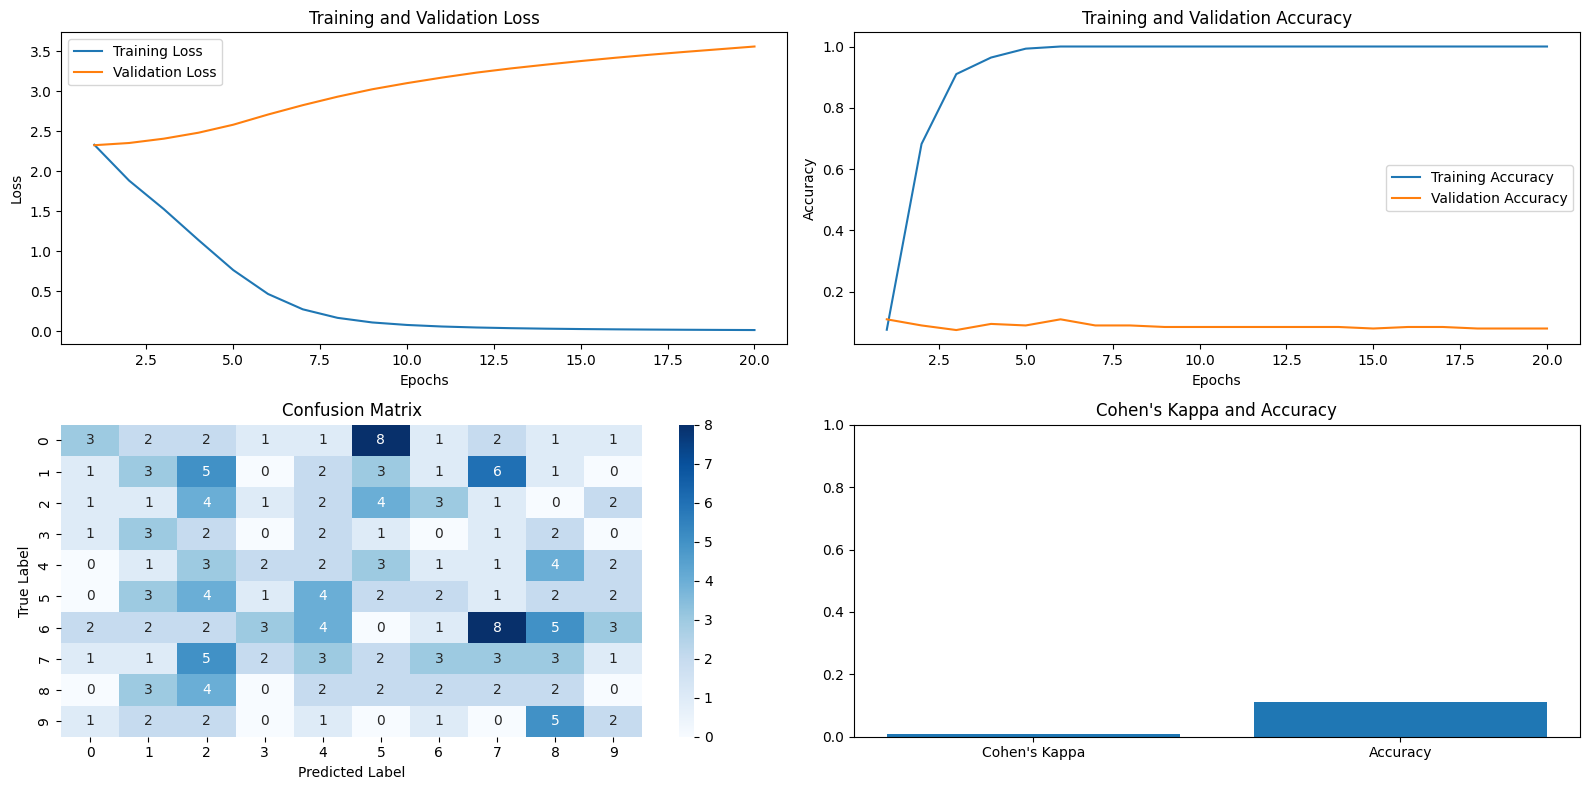


Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.14      0.19        22
           1       0.14      0.14      0.14        22
           2       0.12      0.21      0.15        19
           3       0.00      0.00      0.00        12
           4       0.09      0.11      0.10        19
           5       0.08      0.10      0.09        21
           6       0.07      0.03      0.04        30
           7       0.12      0.12      0.12        24
           8       0.08      0.12      0.10        17
           9       0.15      0.14      0.15        14

    accuracy                           0.11       200
   macro avg       0.12      0.11      0.11       200
weighted avg       0.12      0.11      0.11       200


Cohen's Kappa: 0.010
Accuracy: 0.110


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, accuracy_score

# Define a simple neural network with one hidden layer
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Parameters
input_size = 784  # Example for MNIST (28x28 images flattened)
hidden_size = 128
num_classes = 10
learning_rate = 0.001
num_epochs = 20
batch_size = 64

# Generate synthetic data (example data, replace with your dataset)
np.random.seed(0)
torch.manual_seed(0)
X_train = torch.randn(1000, input_size)
y_train = torch.randint(0, num_classes, (1000,))
X_valid = torch.randn(200, input_size)
y_valid = torch.randint(0, num_classes, (200,))
X_test = torch.randn(200, input_size)
y_test = torch.randint(0, num_classes, (200,))

train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
valid_dataset = torch.utils.data.TensorDataset(X_valid, y_valid)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(dataset=valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Model, criterion, optimizer
model = SimpleNN(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training and validation
train_losses, valid_losses = [], []
train_perfs, valid_perfs = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss, train_correct = 0, 0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * batch_x.size(0)
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == batch_y).sum().item()

    train_loss /= len(train_loader.dataset)
    train_accuracy = train_correct / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_perfs.append(train_accuracy)

    model.eval()
    valid_loss, valid_correct = 0, 0
    with torch.no_grad():
        for batch_x, batch_y in valid_loader:
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            valid_loss += loss.item() * batch_x.size(0)
            _, predicted = torch.max(outputs, 1)
            valid_correct += (predicted == batch_y).sum().item()

    valid_loss /= len(valid_loader.dataset)
    valid_accuracy = valid_correct / len(valid_loader.dataset)
    valid_losses.append(valid_loss)
    valid_perfs.append(valid_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Valid Loss: {valid_loss:.4f}, Valid Accuracy: {valid_accuracy:.4f}')

# Plotting the results
plt.figure(figsize=(16, 8))

# Plot training and validation loss
plt.subplot(2, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot training and validation accuracy
plt.subplot(2, 2, 2)
plt.plot(range(1, num_epochs + 1), train_perfs, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), valid_perfs, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Evaluate on the test set
model.eval()
test_preds, test_labels = [], []
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        outputs = model(batch_x)
        _, predicted = torch.max(outputs, 1)
        test_preds.extend(predicted.cpu().numpy())
        test_labels.extend(batch_y.cpu().numpy())

# Classification report
report = classification_report(test_labels, test_preds, output_dict=True)

# Plot confusion matrix
plt.subplot(2, 2, 3)
conf_matrix = confusion_matrix(test_labels, test_preds)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Cohen's Kappa and Accuracy
kappa = cohen_kappa_score(test_labels, test_preds)
accuracy = accuracy_score(test_labels, test_preds)

plt.subplot(2, 2, 4)
plt.bar(['Cohen\'s Kappa', 'Accuracy'], [kappa, accuracy])
plt.ylim(0, 1)
plt.title('Cohen\'s Kappa and Accuracy')

plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(test_labels, test_preds))
print(f"\nCohen's Kappa: {kappa:.3f}")
print(f"Accuracy: {accuracy:.3f}")
